In [119]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Your own logistic regression model

This time it's your turn to create a logistic regression model. The [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)), that we're going to work with, contains diagnostic information about breast cancer. The medical features of individual tumors like size, shape and smoothness were measured and were labeled as maligant(0) or benign(1).  

In [120]:
data = load_breast_cancer(as_frame=True)
features = data["data"]
feature_names = data["feature_names"]
labels = data["target"]
label_names = data["target_names"]

print(features.columns)
print(labels[15:20])
print(label_names)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
15    0
16    0
17    0
18    0
19    1
Name: target, dtype: int32
['malignant' 'benign']


### Data exploration

Let's have a closer look on the distribution of the data. How many tumors are there in the dataset overall? Also find out how many tumors were classified as malignant and how many as benign. Is this a well balanced dataset or is one kind overrepresented?

In [121]:
print(labels.value_counts())

1    357
0    212
Name: target, dtype: int64


Next we should deal with the features and decide if we have to preprocess them or use them as they are. What are the datatypes of the features? If they are non-numerical we need to convert them to quantify them. Are there any missing values or NaNs(not-a-number)? 

In [122]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Have a look at a specific column. What is the mean and the standard deviation of the "mean radius" of the tumors? Can you test if there is a correlation between "mean radius", "mean perimeter" and "mean area"?

Hint: You can access a sub-dataframe of a pandas-dataframe by giving it a list of columns as its index:

```my_subframe = my_dataframe[["column1","column2","column3"]]```

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64


c:\Users\lukas\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


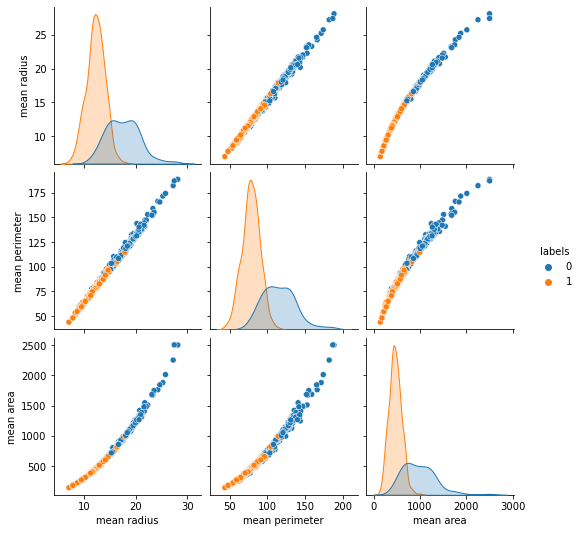

In [123]:
print(features["mean radius"].describe())

test_df = features[["mean radius", "mean perimeter", "mean area"]]
test_df["labels"] = labels
sns.pairplot(test_df, hue="labels") 

## Data preparation

To validate your model in the end you will need a separate test-set. Therefore you should split your data in two random subset for training and testing now. Your test-set should contain 15% of your total dataset. Also make sure, that your subsets have the expected sample-size

In [124]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(483, 30)
(86, 30)
(483,)
(86,)


Standardize the training-data and the test-data with the mean and the standard-deviation of the training-data

In [125]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

Now it's finally time to create your model and fit it to the data in your training-set.

In [126]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

Evaluate your model by a metric of your choice

In [127]:
y_prediction = model.predict(X_test_scaled)
print(f"The accuracy on the test set is {metrics.accuracy_score(y_test, y_prediction): .2f}")
print(f"The precision on the test set is {metrics.precision_score(y_test, y_prediction, average='micro')}")
print(f"The recall on the test set is {metrics.recall_score(y_test, y_prediction, average='micro')}")
print(f"The f1_score on the test set is {metrics.f1_score(y_test, y_prediction, average='micro')}")

The accuracy on the test set is  0.97
The precision on the test set is 0.9651162790697675
The recall on the test set is 0.9651162790697675
The f1_score on the test set is 0.9651162790697675


Finally visualize the results of your prediction in a confusion-matrix.

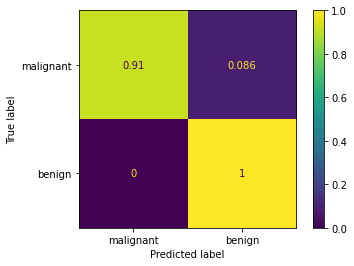

In [128]:
cm = confusion_matrix(y_test, y_prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.show()

Right now we classify the tumors straight up according to which one has the higher probability, the decision-treshold is 0.5, which makes sense in most cases. In other cases we can improve the model by adjusting the decision-threshold, e.g. a tumor has to have a probability of 90% to be classified as benign otherwise we will classify it as malignant. This might even make sense, if it lowers the accuracy of the model, especially in this example. Why?

The next code-box offers a way to play around with different decision-thresholds. Uncomment the variables and update them with your variable-names have a look at how the threshold affects the prediction outcome.

In [129]:
# X_test_scaled = your_X_test_scaled
# y_test = your_test_scaled
# model = your_model


pred_proba = model.predict_proba(X_test_scaled)
threshold_list = [0.1, 0.3, 0.5, 0.7, 0.9]
for i in threshold_list:
    print (f"\n******** For i = {i: .1f} ******")
    Y_test_pred = (pred_proba[:,1] > i).astype(int)
    test_accuracy = metrics.accuracy_score(y_test, Y_test_pred)
    print(f"Our testing accuracy is {test_accuracy: .2f}")

    print(confusion_matrix(y_test, Y_test_pred))


******** For i =  0.1 ******
Our testing accuracy is  0.91
[[27  8]
 [ 0 51]]

******** For i =  0.3 ******
Our testing accuracy is  0.94
[[30  5]
 [ 0 51]]

******** For i =  0.5 ******
Our testing accuracy is  0.97
[[32  3]
 [ 0 51]]

******** For i =  0.7 ******
Our testing accuracy is  0.98
[[33  2]
 [ 0 51]]

******** For i =  0.9 ******
Our testing accuracy is  0.97
[[35  0]
 [ 3 48]]


**Congratulations on building your own logistic regression model!**